<a href="https://colab.research.google.com/github/jcsh4326/notebook/blob/master/TensorFlow_03_Softmax_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
cite [Stanford UFLDL Tutorial](http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/)

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. 


## logistic regression
In logistic regression we assumed that the labels were binary: $y^{(i)} \in \{0, 1\}$. We used such a classifer to distinguish between two kinds of hand-written digits.

Softmax regression allows us to handle $y^{(i)} \in \{i,...,K\}$  where K is the number of classes, and so the label $y$ can take on $K$ different values.

Recall that in logistic regression, we had a training set $\{(x^{(1)}, y^{(1)}),..., (x^{(m)}, y^{(m)})\}$ of $m$ labeled examples, where the input features are $x^{(i)} \in R^n$. With logistic regression, we were in the binary classification setting, so the labels were $y^{(i)} \in \{0, 1\}$.Our hypothesis took the form:
$$ h_θ(x) = \frac{ 1 }{ 1 + exp(-θ^Tx) } $$

<sub>FYI. $T$ for matrix transpose, such as `\top, \mathsf{T}, and \intercal`</sub>

and the model parameters θ where trained to minimize the cost function(sometimes called loss function)
$$ J(θ) = -[\sum_{i=0}^m{y^{(i)}logh_θ(x^{(i)})}+(1 - y^{(i)}log(1 - h_θ(x^{(i)})))] $$



FYI. 
A **logistic function** or **logistic curve** is a common "S" shape (sigmoid curve), with equation:
$$f(x) = \frac{L}{1+exp^{-k(x-x_0)}}$$
The standard logistic function is the logistic function with parameters (k = 1, x0 = 0, L = 1)

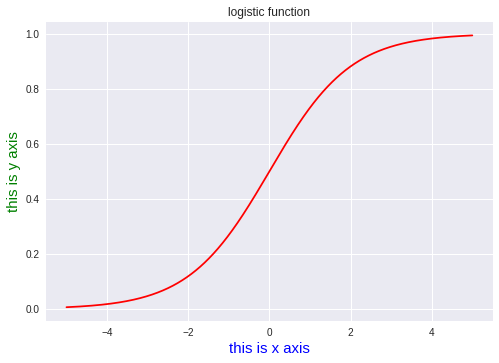

In [0]:
#@title sigmoid function
#@markdown sigmoid function is a special case of the Logistic function when L=1, k=1, x0=0 <br> p(x) = 1/(1 + e^(-x))
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1 + np.exp(-x))
plt.title("sigmoid function")
plt.xlabel("this is x axis",fontsize=15,color='b')
plt.ylabel("this is y axis",fontsize=15,color='g')
x = np.arange(-6.0,6,0.001)
plt.plot(x,sigmoid(x),'r')
plt.show()

## softmax regression
In softmax regression we had a training set $\{(x^{(1)}, y^{(1)}),..., (x^{(m)}, y^{(m)})\}$,  $y_{(i)} \in \{1,2,...,K\}$. Given a test input $x$, we want our hypothesis to estimate the probability that $P(y = k|x)$ for each value of $k = 1,...,K$. I.e., we want to estimate the probability of the class label taking on each of the $K$ different possible values. Thus, our hypothesis will output a $K-$dimensional vector (whose elements sum to 1) giving us our $K$ estimated probabilities.  Concretely, our hypothesis $$h_θ(x) = \begin{pmatrix} P(y = 1|x;θ) \\ P(y = 2|x;θ) \\\vdots \\ P(y = K|x;θ) \end{pmatrix} = \frac{1}{\sum_{j=1}^K exp(θ^{(j)T}x)}\begin{pmatrix}exp(θ^{(1)T}x)\\exp(θ^{(2)T}x)\\ \vdots \\exp(θ^{(K)T}x) \end{pmatrix}$$

Here $θ^{(1)}, θ^{(2)}, \cdots, θ^{(K)} \in R^n$ are the parameters of our model. Notice that the term $\frac{1}{\sum_{j=1}^K exp(θ^{(j)T}x)}$ normallizes the distribution, so that it sums to one.

## cost function
In the equation below, $1\{\cdot\}$ is the "indicator function", so that $1\{a true statement\} = 1$, and $1\{a false statement\} = 0$.
In the equation 
###  logistic regression

$$J(θ)=-\lbrack\sum_{i=1}^m(1-y^{(i)})log(1-h_θ(x^{(i)}))+y^{(i)}logh_θ(x^{(i)})\rbrack=-[\sum_{i=1}^m\sum_{k=0}^11\{y^{(i)}=k\}logP(y^{(i)}=k|x^{(i)};θ)]$$

in the equation, $k$ is the class labels, $0 or 1$, $m$ is the labeld examples number ,  from $1$ to $m$.

Generalizing the logistic regression cost function, our cost function will be:
$$J(θ)=-[\sum_{(i=1)}^m\sum_{(k=1)}^K1\{y^{(i)=k}\}log\frac{exp(θ^{(k)T}x^{(i)})}{\sum_{j=1}^Kexp(θ^{(j)T}x^{(i)})}]$$

### softmax regression
The softmax regression cost function is similar, except that we now sum over the $K$ different possible values of the class label. Note also that in softmax regression, we have that
$$P(y^{(i)} = k|x^{(i)};θ) = \frac{exp(θ^{(k)T}x^{(i)})}{\sum_{j=1}^Kexp(θ^{(j)T}x^{(i)})}$$

For solving the minimum of $J(θ)$, we resort to an iterative optimization algorithm, such as L-BFGS, gradient descent.

Taking derivatives,  one can show that the gradient is:
$$\nabla_{\theta^{(k)}}J(\theta) = - \sum_{i=1}^M[x^{(i)}(1\{y^{(i)}=k\}-P(y{(i)}=k|x^{(i)};\theta))]$$

In particular, $\nabla_{\theta^{(k)}}J(\theta)$ is itself a vector, so that its $l$-th element is $\frac{\partial J(\theta)}{\partial\theta_{lk}}$ the partial derivative of $J(\theta)$ with respect of the $l$-th element of $\theta^{(k)}$.

In the standard implementation of gradient descent, each iteration requires the following updates:
$$\theta_j := \theta_j - \alpha\nabla_{\theta_j}J(\theta)(j = 1,...,k)$$

## weight decay
Softmax regression has a "redundant" set of parameters.

If we subtract some fixed vector $\psi$ from out parameter vectors $\theta^{(j)}$, so that every $\theta^{(j)}$ is now replaced with $\theta^{(j)} - \psi$ (for every $j = 1,...,k$). So the class label probabilities as 
$$P(y^{(i)} = k|x^{(i);\theta}) =  \frac{exp((θ^{(k)}-\psi)^Tx^{(i)})}{\sum_{j=1}^Kexp((θ^{(j)}-\psi)^Tx^{(i)})}=\frac{exp(\theta^{(k)T}x^{(i)})exp(-\psi^Tx^{(i)})}{\sum_{j=1}^Kexp(\theta^{(j)T}x^{(i)})exp(-\psi^Tx^{(i)})}= \frac{exp(θ^{(k)T}x^{(i)})}{\sum_{j=1}^Kexp(θ^{(j)T}x^{(i)})}$$

As the equation shows, there are multiple parameter settings that give rise to exactly the same hypothesis function $h_\theta$ mapping from inputs $x$ to the predictions. Thus, the minimizer of $J(\theta)$ is not unique.

$J(\theta)$ is still convex, and thus gradient descent will not run into local optima problems, but the Hessian is singular/non-invertible, which causes a straightforward implementation of Newton’s method to run into numerical problems.

for optimizing the clear and definite parameters, we remain all the parameters instead of setting one of the parameters to 0 by changing the cost function with "weight decay item".

A weight decay item $\frac{ \lambda }{2}\sum_{i=1}^k\sum_{j=0}^m\theta_{ij}^2$ penalizes large values of the parameters.

$$J(θ)=-[\sum_{(i=1)}^m\sum_{(k=1)}^K1\{y^{(i)=k}\}log\frac{exp(θ^{(k)T}x^{(i)})}{\sum_{j=1}^Kexp(θ^{(j)T}x^{(i)})}] + \frac{ \lambda }{2}\sum_{i=1}^k\sum_{j=0}^m\theta_{ij}^2$$

The cost function now is strictly convex, and is guaranteed to have a unique solution.

To apply an optimization algorithm, we also need the derivative of this new definition of $J(\theta)$, one can show that the derivative is:
 $$\nabla_{\theta^{(k)}}J(\theta) = - \sum_{i=1}^M[x^{(i)}(1\{y^{(i)}=k\}-P(y{(i)}=k|x^{(i)};\theta))] + \lambda\theta_k $$


# Implement



 Below we will implement a softmax regression algorithm with TensorFlow.

In [0]:
#@title import
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
#@title define placeholder for inputs to algorithm
inputs = tf.placeholder(tf.float32, [None, None])
labels = tf.placeholder(tf.float32, [None, 10])

In [0]:
#@title add layer
def add_layer(inputs, w_dimension):
  # 10 class labels
  W = tf.Variable(tf.zeros([w_dimension, 10]))
  biases = tf.Variable(tf.zeros([10]))
  outputs = tf.nn.softmax(tf.matmul(inputs, W) + biases)
  return outputs

In [0]:
#@title define loss function/coss function

prediction = add_layer(inputs, w_dimension=784)
loss = tf.reduce_sum(labels*tf.log(prediction))

In [0]:
#@title train
l_r = 0.01 # learning rate
train_step = tf.train.GradientDescentOptimizer(l_r).minimize(loss)

In [0]:
#@title init
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
#@title train data
itera = 1000
for i in range(itera):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={inputs: batch_xs, labels: batch_ys})


In [0]:
#@title accuracy
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={inputs: mnist.test.images, labels: mnist.test.labels}))

0.098
